# Data exploration of the CFIS-W3 lensing catalogue

In this notebook, we are using the non-public data provided here.

Full W3 field (50 deg^2):
https://filesender.renater.fr/?s=download&token=63c8ace7-9dff-42ef-b593-26e945c1101f

Smaller sub-field (4 deg^2):
https://filesender.renater.fr/?s=download&token=04805522-29da-49f7-9585-1a84cdb5e07c

In [16]:
import os
import numpy as np
%matplotlib inline

## Set paths

In [4]:
data_dir = f'{os.environ["HOME"]}/data_WL'

In [5]:
galaxy_cat_path = f'{data_dir}/final_cat.npy'

## Load data

In [8]:
dd = np.load(galaxy_cat_path, mmap_mode=None)

In [13]:
# Print column names
print(dd.dtype.names)

('XWIN_WORLD', 'YWIN_WORLD', 'TILE_ID', 'FLAGS', 'IMAFLAGS_ISO', 'NGMIX_MCAL_FLAGS', 'NGMIX_ELL_PSFo_NOSHEAR', 'SPREAD_CLASS', 'SPREAD_MODEL', 'SPREADERR_MODEL', 'N_EPOCH', 'NGMIX_N_EPOCH', 'NGMIX_ELL_1M', 'NGMIX_ELL_1P', 'NGMIX_ELL_2M', 'NGMIX_ELL_2P', 'NGMIX_ELL_NOSHEAR', 'NGMIX_ELL_ERR_NOSHEAR', 'NGMIX_FLAGS_1M', 'NGMIX_FLAGS_1P', 'NGMIX_FLAGS_2M', 'NGMIX_FLAGS_2P', 'NGMIX_FLAGS_NOSHEAR', 'NGMIX_T_1M', 'NGMIX_T_1P', 'NGMIX_T_2M', 'NGMIX_T_2P', 'NGMIX_T_NOSHEAR', 'NGMIX_T_ERR_1M', 'NGMIX_T_ERR_1P', 'NGMIX_T_ERR_2M', 'NGMIX_T_ERR_2P', 'NGMIX_T_ERR_NOSHEAR', 'NGMIX_Tpsf_1M', 'NGMIX_Tpsf_1P', 'NGMIX_Tpsf_2M', 'NGMIX_Tpsf_2P', 'NGMIX_Tpsf_NOSHEAR', 'NGMIX_FLUX_1M', 'NGMIX_FLUX_1P', 'NGMIX_FLUX_2M', 'NGMIX_FLUX_2P', 'NGMIX_FLUX_NOSHEAR', 'NGMIX_FLUX_ERR_1M', 'NGMIX_FLUX_ERR_1P', 'NGMIX_FLUX_ERR_2M', 'NGMIX_FLUX_ERR_2P', 'NGMIX_FLUX_ERR_NOSHEAR', 'FLAG_TILING', 'MAG_AUTO', 'SNR_WIN', 'NGMIX_T_PSFo_NOSHEAR', 'NGMIX_MOM_FAIL')


In [14]:
# Number of objects
dd.shape

(406934,)

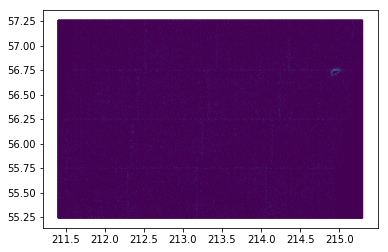

In [17]:
# Show sky area
plt.hexbin(dd['XWIN_WORLD'], dd['YWIN_WORLD'], gridsize=1000)

In [28]:
# Mean ellipticity
np.mean(dd['NGMIX_ELL_NOSHEAR'][:,1])

-0.13333201785421145

In [29]:
# Cut invalid objects (PSF = -10)
valid = dd['NGMIX_ELL_PSFo_NOSHEAR'][:,0] != -10
np.mean(dd['NGMIX_ELL_NOSHEAR'][:,1][valid])

0.00043006853581854457